In [1]:
import mlrun

In [2]:
project  = mlrun.get_or_create_project('gilad-testing','./')

> 2022-09-20 08:46:53,218 [info] loaded project gilad-testing from MLRun DB


In [3]:
# mlrun: start-code

In [4]:
def add_2(event):
    event['num']+=2
    return event

In [5]:
# mlrun: end-code

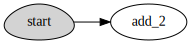

In [6]:
serv_func = mlrun.code_to_function('serving',kind='serving',image='mlrun/mlrun')

graph = serv_func.set_topology('flow','sync')
graph.to(name='add_2',handler='add_2').respond()
graph.plot(rankdir='LR')

In [7]:
serv_func.deploy()

> 2022-09-20 08:48:39,704 [info] Starting remote function deploy
2022-09-20 08:48:40  (info) Deploying function
2022-09-20 08:48:40  (info) Building
2022-09-20 08:48:41  (info) Staging files and preparing base images
2022-09-20 08:48:41  (info) Building processor image
2022-09-20 08:49:56  (info) Build complete
2022-09-20 08:50:06  (info) Function deploy complete
> 2022-09-20 08:50:07,330 [info] successfully deployed function: {'internal_invocation_urls': ['nuclio-gilad-testing-serving.default-tenant.svc.cluster.local:8080'], 'external_invocation_urls': ['gilad-testing-serving-gilad-testing.default-tenant.app.cust-cs-il-3-4-1.iguazio-cd1.com/']}


'http://gilad-testing-serving-gilad-testing.default-tenant.app.cust-cs-il-3-4-1.iguazio-cd1.com/'

In [8]:
project.set_function('db://gilad-testing/serving')

In [9]:
project.save()

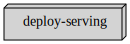

In [ ]:
project.run(workflow_path='workflow.py',watch=True)